In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

from sys_pde_no_growth_no_Lmx1a_GRN import *

In [2]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                # Hill coefficient
sys_params[1] = 0.7              # BMP(t=0)

# BMP
b_params = np.zeros(3)
b_params[0] = 1                  # a_b_s
b_params[1] = 0.1**sys_params[0] # K_b_s (with exponent)
b_params[2] = 0.1                # d_b

# BMP i
i_params = np.zeros(3)
i_params[0] = 1                  # a_i_s
i_params[1] = 0.1**sys_params[0] # K_i_s
i_params[2] = 0.1                # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 1                  # a_s_b
s_params[1] = 0.1**sys_params[0] # K_s_b
s_params[2] = 0.1**sys_params[0] # K_s_i
s_params[3] = 1                  # d_s

In [3]:
# Define all the simulations params
sol_params = np.zeros(3)
sol_params[0] = 0.05 # dt 
sol_params[1] = 160/sol_params[0] # Total time, T
sol_params[2] = 1/sol_params[0] # Delta t (snapshot saving time)

In [4]:
# Get the initial conditions
b, i, s = create_IC_1(sys_params)

KeyboardInterrupt: 

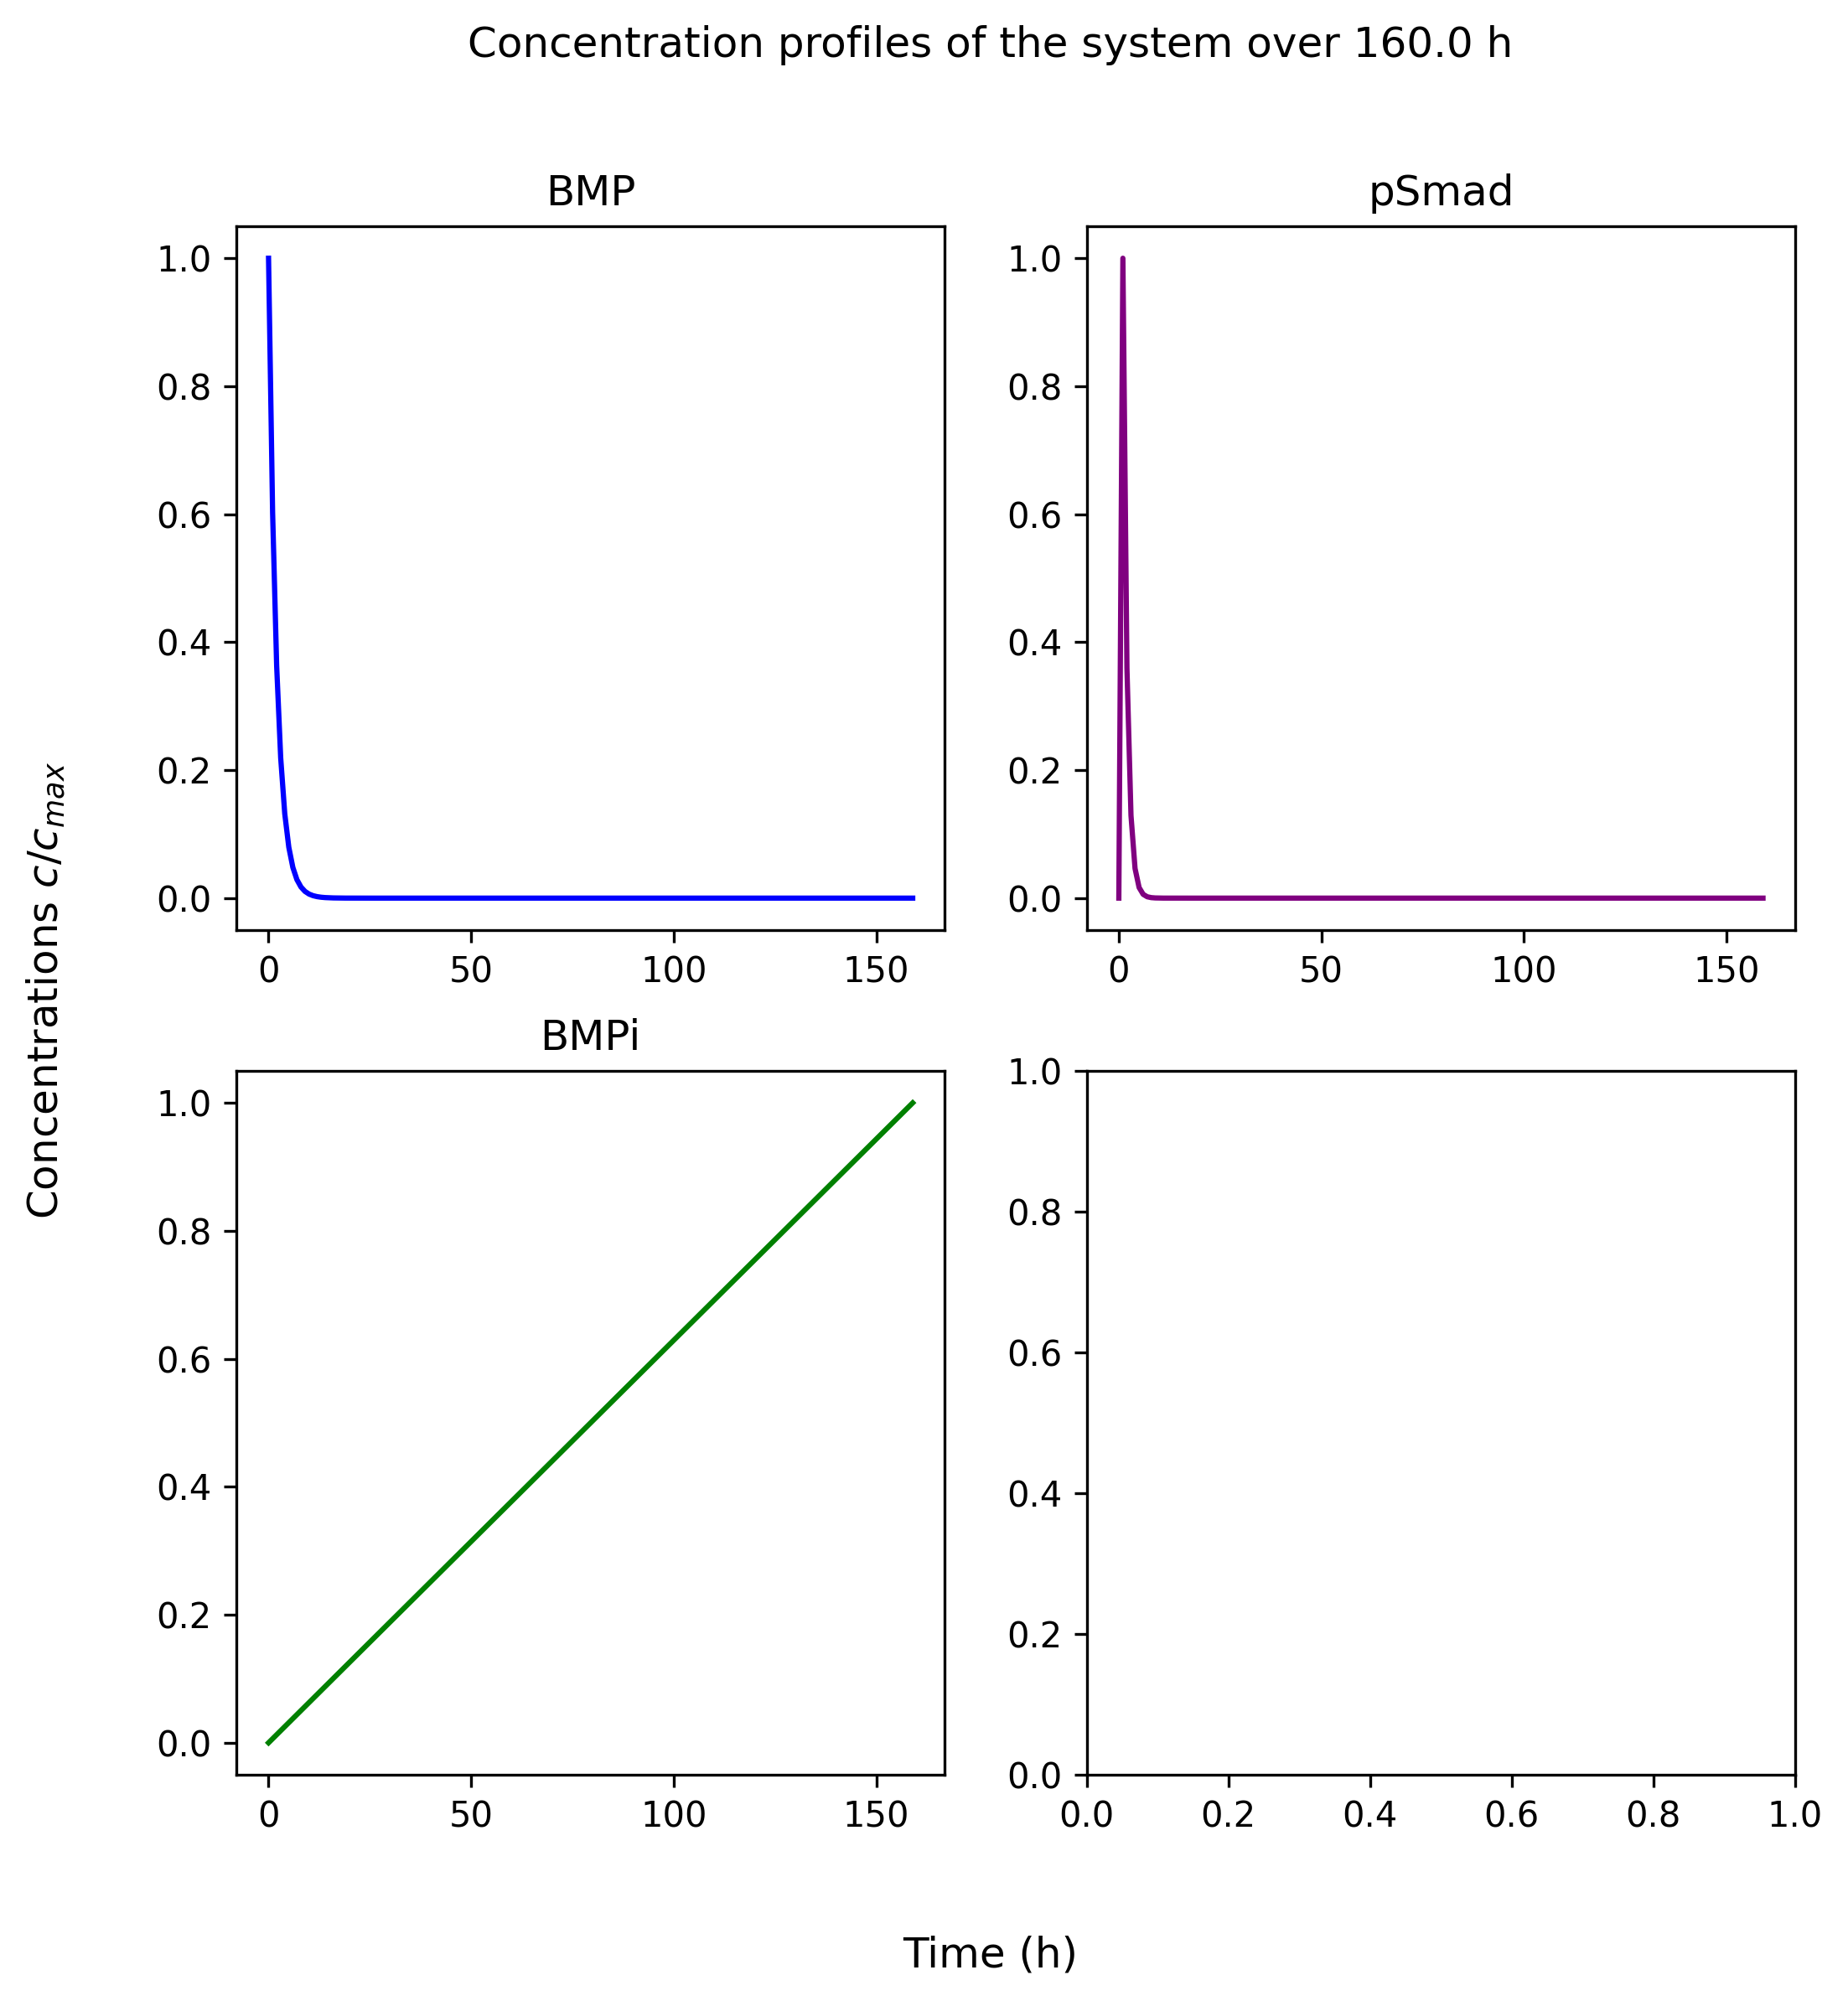

In [5]:
for a_b_s in [0.1, 0.25, 0.5, 1, 1.5, 2]:
    for K_b_s in [0.05, 0.1, 0.2, 0.5]:
        for a_i_s in [0.1, 0.25, 0.5, 1, 1.5, 2]:
            for K_i_s in [0.05, 0.1, 0.2, 0.5]:
                for a_s_b in [0.1, 0.25, 0.5, 1, 1.5, 2]:
                    for K_s_b in [0.05, 0.1, 0.2, 0.5]:
                        for K_s_i in [0.05, 0.1, 0.2, 0.5]:
                            for d_b in [0.1, 0.25, 0.5, 0.75, 1]:
                                for d_i in [0.1, 0.25, 0.5, 0.75, 1]:
                                    b_params[0] = a_b_s
                                    b_params[1] = K_b_s**sys_params[0]
                                    b_params[2] = d_b 

                                    i_params[0] = a_i_s
                                    i_params[1] = K_i_s**sys_params[0]
                                    i_params[2] = d_i

                                    s_params[0] = a_s_b
                                    s_params[1] = K_s_b**sys_params[0]
                                    s_params[2] = K_s_i**sys_params[0]

                                    # Get the initial conditions
                                    b, i, s = create_IC_1(sys_params)

                                    data_b_time, data_i_time, data_s_time = run_and_save_sys(b, i, s, 
                                                         b_params, i_params, s_params,
                                                         sys_params, sol_params)
                                    
                                    # Plot all the conncs as a function of time over one axis from the center
                                    fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
                                    b_concs_t = data_b_time/np.max(data_b_time)
                                    i_concs_t = data_i_time/np.max(data_i_time)
                                    s_concs_t = data_s_time/np.max(data_s_time)

                                    delta_T = data_b_time.shape[0]
                                    axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], b_concs_t, color = "Blue")
                                    axes[0,0].set_title("BMP")
                                    axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], i_concs_t, color = "Green")
                                    axes[1,0].set_title("BMPi")
                                    axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], s_concs_t, color = "Purple")
                                    axes[0,1].set_title("pSmad")
                                    fig.supylabel(r'Concentrations $c/c_{max}$')
                                    fig.supxlabel('Time (h)')
                                    plt.suptitle("Concentration profiles of the system over {} h".format(sol_params[1]*sol_params[0]))
                                    plt.savefig("NoGrowth_GRN/Conc_end_time_abs_{}_Kbs_{}_db_{}_ais_{}_Kis_{}_di_{}_asb_{}_Ksb_{}_Ksi_{}_ds_{}.jpeg".format(
                                        a_b_s, K_b_s, d_b, a_i_s, K_i_s, d_i, a_s_b, K_s_b, K_s_i, s_params[3]
                                    ), 
                                                dpi=600)
                                    plt.close(1);